In [1]:
!pip install fastai==2.2.7  && pip install -Uqq torchsummary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 193 kB 21.9 MB/s 
     |████████████████████████████████| 12.8 MB 66.7 MB/s 
     |████████████████████████████████| 55 kB 4.6 MB/s 
     |████████████████████████████████| 10.4 MB 8.7 MB/s 
     |████████████████████████████████| 776.8 MB 17 kB/s 
     |████████████████████████████████| 184 kB 76.8 MB/s 
     |████████████████████████████████| 1.0 MB 65.2 MB/s 
  Attempting uninstall: srsly
    Found existing installation: srsly 2.4.4
    Uninstalling srsly-2.4.4:
      Successfully uninstalled srsly-2.4.4
  Attempting uninstall: catalogue
    Found existing installation: catalogue 2.0.8
    Uninstalling catalogue-2.0.8:
      Successfully uninstalled catalogue-2.0.8
  Attempting uninstall: torch
    Found existing installation: torch 1.12.1+cu113
    Uninstalling torch-1.12.1+cu113:
      Successfully uninstalled torch-1.12.1+cu113
  Attempting un

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
from sklearn import linear_model
import seaborn as sns
import sklearn

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import torch 
import torch.nn as nn
import matplotlib
import matplotlib.pyplot as plt
from fastai.vision.all import *
from fastai.data.all import *
%matplotlib inline

import torch 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

import fastai
assert fastai.__version__ >= '2.2.7'

In [4]:
df = pd.read_csv("csgo_games.csv")

In [5]:
df.describe()

,t1_points,t2_points,t1_world_rank,t2_world_rank,t1_h2h_win_perc,t2_h2h_win_perc,t1_player1_rating,t1_player1_impact,t1_player1_kdr,t1_player1_dmr,...,t2_player5_apr,t2_player5_dpr,t2_player5_spr,t2_player5_opk_ratio,t2_player5_opk_rating,t2_player5_wins_perc_after_fk,t2_player5_fk_perc_in_wins,t2_player5_multikill_perc,t2_player5_rating_at_least_one_perc,t2_player5_clutch_win_perc
count,3787.000000,3787.000000,3787.000000,3787.000000,3787.000000,3787.000000,3787.000000,3787.000000,3787.000000,3787.000000,...,3787.000000,3787.000000,3787.000000,3787.000000,3787.000000,3786.000000,3787.000000,3787.000000,3787.000000,3787.000000
mean,7.829945,7.687351,8.836810,9.836546,0.517780,0.482220,1.185255,1.230552,1.211069,82.257882,...,0.134177,0.668492,0.085883,0.881109,0.933752,0.743385,0.123172,0.142620,0.479368,0.593293
std,6.869174,6.894263,5.550307,5.616128,0.228813,0.228813,0.067781,0.106033,0.112633,4.527635,...,0.019367,0.034841,0.015337,0.174513,0.072848,0.048824,0.025787,0.015386,0.099792,0.143225
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.970000,0.880000,0.870000,63.200000,...,0.040000,0.530000,0.020000,0.000000,0.490000,0.375000,0.000000,0.059829,0.000000,0.000000
25%,2.000000,2.000000,4.000000,5.000000,0.389566,0.333333,1.140000,1.160000,1.130000,79.200000,...,0.120000,0.650000,0.080000,0.770000,0.890000,0.715250,0.105000,0.132526,0.417000,0.500000
50%,6.000000,5.000000,8.000000,10.000000,0.500000,0.500000,1.180000,1.230000,1.200000,82.400000,...,0.130000,0.670000,0.090000,0.870000,0.930000,0.747000,0.121000,0.143365,0.483000,0.600000
75%,16.000000,16.000000,13.000000,15.000000,0.666667,0.610434,1.230000,1.300000,1.270000,85.300000,...,0.150000,0.690000,0.100000,0.980000,0.980000,0.775000,0.139000,0.152723,0.544000,0.676471
max,34.000000,34.000000,22.000000,22.000000,1.000000,1.000000,1.440000,1.790000,1.600000,98.700000,...,0.210000,0.810000,0.150000,2.120000,1.200000,1.000000,0.221000,0.194529,0.802000,1.000000


In [6]:
df.head()

,match_date,team_1,team_2,t1_points,t2_points,t1_world_rank,t2_world_rank,t1_h2h_win_perc,t2_h2h_win_perc,winner,...,t2_player5_dpr,t2_player5_spr,t2_player5_opk_ratio,t2_player5_opk_rating,t2_player5_wins_perc_after_fk,t2_player5_fk_perc_in_wins,t2_player5_multikill_perc,t2_player5_rating_at_least_one_perc,t2_player5_is_sniper,t2_player5_clutch_win_perc
0,2016-12-18,CLOUD9,HELLRAISERS,13,16,9,20,0.500000,0.500000,t2,...,0.63,0.10,1.05,0.92,0.733,0.104,0.147018,0.528,False,0.666667
1,2016-12-18,IMMORTALS,G2,17,19,13,10,0.500000,0.500000,t2,...,0.69,0.09,0.85,0.96,0.739,0.147,0.135810,0.438,True,0.406250
2,2016-12-18,MOUSESPORTS,IMMORTALS,16,3,12,13,0.500000,0.500000,t1,...,0.67,0.07,0.79,0.94,0.723,0.129,0.148257,0.526,False,0.733333
3,2016-12-18,DIGNITAS,G2,16,9,6,10,0.416667,0.583333,t1,...,0.69,0.09,0.85,0.96,0.739,0.147,0.135810,0.438,True,0.406250
4,2016-12-18,OPTIC,HELLRAISERS,16,10,4,20,0.500000,0.500000,t1,...,0.63,0.10,1.05,0.92,0.733,0.104,0.147018,0.528,False,0.666667


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1e50c017d0>]],
      dtype=object)

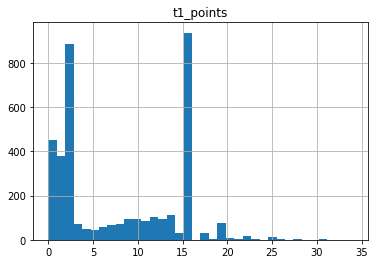

In [7]:
df.hist("t1_points", bins=36)

In [8]:
df = df[df.winner != "draw"]
dict = {'t1' : 1, 't2' : 0}
df.replace({"winner":dict})

,match_date,team_1,team_2,t1_points,t2_points,t1_world_rank,t2_world_rank,t1_h2h_win_perc,t2_h2h_win_perc,winner,...,t2_player5_dpr,t2_player5_spr,t2_player5_opk_ratio,t2_player5_opk_rating,t2_player5_wins_perc_after_fk,t2_player5_fk_perc_in_wins,t2_player5_multikill_perc,t2_player5_rating_at_least_one_perc,t2_player5_is_sniper,t2_player5_clutch_win_perc
0,2016-12-18,CLOUD9,HELLRAISERS,13,16,9,20,0.500000,0.500000,0,...,0.63,0.10,1.05,0.92,0.733,0.104,0.147018,0.528,False,0.666667
1,2016-12-18,IMMORTALS,G2,17,19,13,10,0.500000,0.500000,0,...,0.69,0.09,0.85,0.96,0.739,0.147,0.135810,0.438,True,0.406250
2,2016-12-18,MOUSESPORTS,IMMORTALS,16,3,12,13,0.500000,0.500000,1,...,0.67,0.07,0.79,0.94,0.723,0.129,0.148257,0.526,False,0.733333
3,2016-12-18,DIGNITAS,G2,16,9,6,10,0.416667,0.583333,1,...,0.69,0.09,0.85,0.96,0.739,0.147,0.135810,0.438,True,0.406250
4,2016-12-18,OPTIC,HELLRAISERS,16,10,4,20,0.500000,0.500000,1,...,0.63,0.10,1.05,0.92,0.733,0.104,0.147018,0.528,False,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3782,2020-01-25,VIRTUS.PRO,CLOUD9,0,2,19,17,0.500000,0.500000,0,...,0.67,0.11,0.80,0.95,0.681,0.121,0.130481,0.444,False,0.777778
3783,2020-01-24,HEROIC,MAD LIONS,10,16,16,18,0.333333,0.666667,0,...,0.65,0.08,0.64,0.80,0.811,0.082,0.095975,0.250,False,0.625000
3784,2020-01-19,HEROIC,FORZE,0,2,16,13,0.857143,0.142857,0,...,0.63,0.09,0.89,0.92,0.747,0.113,0.154618,0.635,False,0.709677
3785,2020-01-19,CR4ZY,FORZE,0,2,20,13,0.538462,0.461538,0,...,0.63,0.09,0.89,0.92,0.747,0.113,0.154618,0.635,False,0.709677


In [9]:
col_list = list(df)
col_player = ['match_date',
 'team_1',
 'team_2',
 't1_points',
 't2_points',
 't1_world_rank',
 't2_world_rank',
 't1_h2h_win_perc',
 't2_h2h_win_perc',
 'winner',

 't1_player2_rating',
 't1_player2_impact',
 't1_player2_kdr',
 't1_player2_dmr',
 't1_player2_kpr',
 't1_player2_apr',
 't1_player2_dpr',
 't1_player2_spr',
 't1_player2_opk_ratio',
 't1_player2_opk_rating',
 't1_player2_wins_perc_after_fk',
 't1_player2_fk_perc_in_wins',
 't1_player2_multikill_perc',
 't1_player2_rating_at_least_one_perc',
 't1_player2_is_sniper',
 't1_player2_clutch_win_perc',
 't1_player3_rating',
 't1_player3_impact',
 't1_player3_kdr',
 't1_player3_dmr',
 't1_player3_kpr',
 't1_player3_apr',
 't1_player3_dpr',
 't1_player3_spr',
 't1_player3_opk_ratio',
 't1_player3_opk_rating',
 't1_player3_wins_perc_after_fk',
 't1_player3_fk_perc_in_wins',
 't1_player3_multikill_perc',
 't1_player3_rating_at_least_one_perc',
 't1_player3_is_sniper',
 't1_player3_clutch_win_perc',
 't1_player4_rating',
 't1_player4_impact',
 't1_player4_kdr',
 't1_player4_dmr',
 't1_player4_kpr',
 't1_player4_apr',
 't1_player4_dpr',
 't1_player4_spr',
 't1_player4_opk_ratio',
 't1_player4_opk_rating',
 't1_player4_wins_perc_after_fk',
 't1_player4_fk_perc_in_wins',
 't1_player4_multikill_perc',
 't1_player4_rating_at_least_one_perc',
 't1_player4_is_sniper',
 't1_player4_clutch_win_perc',
 't1_player5_rating',
 't1_player5_impact',
 't1_player5_kdr',
 't1_player5_dmr',
 't1_player5_kpr',
 't1_player5_apr',
 't1_player5_dpr',
 't1_player5_spr',
 't1_player5_opk_ratio',
 't1_player5_opk_rating',
 't1_player5_wins_perc_after_fk',
 't1_player5_fk_perc_in_wins',
 't1_player5_multikill_perc',
 't1_player5_rating_at_least_one_perc',
 't1_player5_is_sniper',
 't1_player5_clutch_win_perc',
 't1_player1_rating',
 't1_player1_impact',
 't1_player1_kdr',
 't1_player1_dmr',
 't1_player1_kpr',
 't1_player1_apr',
 't1_player1_dpr',
 't1_player1_spr',
 't1_player1_opk_ratio',
 't1_player1_opk_rating',
 't1_player1_wins_perc_after_fk',
 't1_player1_fk_perc_in_wins',
 't1_player1_multikill_perc',
 't1_player1_rating_at_least_one_perc',
 't1_player1_is_sniper',
 't1_player1_clutch_win_perc',

 't2_player2_rating',
 't2_player2_impact',
 't2_player2_kdr',
 't2_player2_dmr',
 't2_player2_kpr',
 't2_player2_apr',
 't2_player2_dpr',
 't2_player2_spr',
 't2_player2_opk_ratio',
 't2_player2_opk_rating',
 't2_player2_wins_perc_after_fk',
 't2_player2_fk_perc_in_wins',
 't2_player2_multikill_perc',
 't2_player2_rating_at_least_one_perc',
 't2_player2_is_sniper',
 't2_player2_clutch_win_perc',
 't2_player3_rating',
 't2_player3_impact',
 't2_player3_kdr',
 't2_player3_dmr',
 't2_player3_kpr',
 't2_player3_apr',
 't2_player3_dpr',
 't2_player3_spr',
 't2_player3_opk_ratio',
 't2_player3_opk_rating',
 't2_player3_wins_perc_after_fk',
 't2_player3_fk_perc_in_wins',
 't2_player3_multikill_perc',
 't2_player3_rating_at_least_one_perc',
 't2_player3_is_sniper',
 't2_player3_clutch_win_perc',
 't2_player4_rating',
 't2_player4_impact',
 't2_player4_kdr',
 't2_player4_dmr',
 't2_player4_kpr',
 't2_player4_apr',
 't2_player4_dpr',
 't2_player4_spr',
 't2_player4_opk_ratio',
 't2_player4_opk_rating',
 't2_player4_wins_perc_after_fk',
 't2_player4_fk_perc_in_wins',
 't2_player4_multikill_perc',
 't2_player4_rating_at_least_one_perc',
 't2_player4_is_sniper',
 't2_player4_clutch_win_perc',
 't2_player5_rating',
 't2_player5_impact',
 't2_player5_kdr',
 't2_player5_dmr',
 't2_player5_kpr',
 't2_player5_apr',
 't2_player5_dpr',
 't2_player5_spr',
 't2_player5_opk_ratio',
 't2_player5_opk_rating',
 't2_player5_wins_perc_after_fk',
 't2_player5_fk_perc_in_wins',
 't2_player5_multikill_perc',
 't2_player5_rating_at_least_one_perc',
 't2_player5_is_sniper',
 't2_player5_clutch_win_perc',
 't2_player1_rating',
 't2_player1_impact',
 't2_player1_kdr',
 't2_player1_dmr',
 't2_player1_kpr',
 't2_player1_apr',
 't2_player1_dpr',
 't2_player1_spr',
 't2_player1_opk_ratio',
 't2_player1_opk_rating',
 't2_player1_wins_perc_after_fk',
 't2_player1_fk_perc_in_wins',
 't2_player1_multikill_perc',
 't2_player1_rating_at_least_one_perc',
 't2_player1_is_sniper',
 't2_player1_clutch_win_perc']


col_team = ['match_date',

 'team_2',
 'team_1',

 't2_points',
 't1_points',

 't2_world_rank',
 't1_world_rank',

 't2_h2h_win_perc',
 't1_h2h_win_perc',

 'winner',

 't2_player1_rating',
 't2_player1_impact',
 't2_player1_kdr',
 't2_player1_dmr',
 't2_player1_kpr',
 't2_player1_apr',
 't2_player1_dpr',
 't2_player1_spr',
 't2_player1_opk_ratio',
 't2_player1_opk_rating',
 't2_player1_wins_perc_after_fk',
 't2_player1_fk_perc_in_wins',
 't2_player1_multikill_perc',
 't2_player1_rating_at_least_one_perc',
 't2_player1_is_sniper',
 't2_player1_clutch_win_perc',
 't2_player2_rating',
 't2_player2_impact',
 't2_player2_kdr',
 't2_player2_dmr',
 't2_player2_kpr',
 't2_player2_apr',
 't2_player2_dpr',
 't2_player2_spr',
 't2_player2_opk_ratio',
 't2_player2_opk_rating',
 't2_player2_wins_perc_after_fk',
 't2_player2_fk_perc_in_wins',
 't2_player2_multikill_perc',
 't2_player2_rating_at_least_one_perc',
 't2_player2_is_sniper',
 't2_player2_clutch_win_perc',
 't2_player3_rating',
 't2_player3_impact',
 't2_player3_kdr',
 't2_player3_dmr',
 't2_player3_kpr',
 't2_player3_apr',
 't2_player3_dpr',
 't2_player3_spr',
 't2_player3_opk_ratio',
 't2_player3_opk_rating',
 't2_player3_wins_perc_after_fk',
 't2_player3_fk_perc_in_wins',
 't2_player3_multikill_perc',
 't2_player3_rating_at_least_one_perc',
 't2_player3_is_sniper',
 't2_player3_clutch_win_perc',
 't2_player4_rating',
 't2_player4_impact',
 't2_player4_kdr',
 't2_player4_dmr',
 't2_player4_kpr',
 't2_player4_apr',
 't2_player4_dpr',
 't2_player4_spr',
 't2_player4_opk_ratio',
 't2_player4_opk_rating',
 't2_player4_wins_perc_after_fk',
 't2_player4_fk_perc_in_wins',
 't2_player4_multikill_perc',
 't2_player4_rating_at_least_one_perc',
 't2_player4_is_sniper',
 't2_player4_clutch_win_perc',
 't2_player5_rating',
 't2_player5_impact',
 't2_player5_kdr',
 't2_player5_dmr',
 't2_player5_kpr',
 't2_player5_apr',
 't2_player5_dpr',
 't2_player5_spr',
 't2_player5_opk_ratio',
 't2_player5_opk_rating',
 't2_player5_wins_perc_after_fk',
 't2_player5_fk_perc_in_wins',
 't2_player5_multikill_perc',
 't2_player5_rating_at_least_one_perc',
 't2_player5_is_sniper',
 't2_player5_clutch_win_perc',

 't1_player1_rating',
 't1_player1_impact',
 't1_player1_kdr',
 't1_player1_dmr',
 't1_player1_kpr',
 't1_player1_apr',
 't1_player1_dpr',
 't1_player1_spr',
 't1_player1_opk_ratio',
 't1_player1_opk_rating',
 't1_player1_wins_perc_after_fk',
 't1_player1_fk_perc_in_wins',
 't1_player1_multikill_perc',
 't1_player1_rating_at_least_one_perc',
 't1_player1_is_sniper',
 't1_player1_clutch_win_perc',
 't1_player2_rating',
 't1_player2_impact',
 't1_player2_kdr',
 't1_player2_dmr',
 't1_player2_kpr',
 't1_player2_apr',
 't1_player2_dpr',
 't1_player2_spr',
 't1_player2_opk_ratio',
 't1_player2_opk_rating',
 't1_player2_wins_perc_after_fk',
 't1_player2_fk_perc_in_wins',
 't1_player2_multikill_perc',
 't1_player2_rating_at_least_one_perc',
 't1_player2_is_sniper',
 't1_player2_clutch_win_perc',
 't1_player3_rating',
 't1_player3_impact',
 't1_player3_kdr',
 't1_player3_dmr',
 't1_player3_kpr',
 't1_player3_apr',
 't1_player3_dpr',
 't1_player3_spr',
 't1_player3_opk_ratio',
 't1_player3_opk_rating',
 't1_player3_wins_perc_after_fk',
 't1_player3_fk_perc_in_wins',
 't1_player3_multikill_perc',
 't1_player3_rating_at_least_one_perc',
 't1_player3_is_sniper',
 't1_player3_clutch_win_perc',
 't1_player4_rating',
 't1_player4_impact',
 't1_player4_kdr',
 't1_player4_dmr',
 't1_player4_kpr',
 't1_player4_apr',
 't1_player4_dpr',
 't1_player4_spr',
 't1_player4_opk_ratio',
 't1_player4_opk_rating',
 't1_player4_wins_perc_after_fk',
 't1_player4_fk_perc_in_wins',
 't1_player4_multikill_perc',
 't1_player4_rating_at_least_one_perc',
 't1_player4_is_sniper',
 't1_player4_clutch_win_perc',
 't1_player5_rating',
 't1_player5_impact',
 't1_player5_kdr',
 't1_player5_dmr',
 't1_player5_kpr',
 't1_player5_apr',
 't1_player5_dpr',
 't1_player5_spr',
 't1_player5_opk_ratio',
 't1_player5_opk_rating',
 't1_player5_wins_perc_after_fk',
 't1_player5_fk_perc_in_wins',
 't1_player5_multikill_perc',
 't1_player5_rating_at_least_one_perc',
 't1_player5_is_sniper',
 't1_player5_clutch_win_perc']

player_shift_map = {} 
for i in range(170):
  player_shift_map[col_list[i]] = col_player[i]

team_shift_map = {}
for i in range(170):
  team_shift_map[col_list[i]] = col_team[i]

In [10]:
df = pd.read_csv("csgo_games.csv")
df = df[df.winner != "draw"]
df = df.dropna()
dict = {'t1' : 1, 't2' : 0}
df = df.replace({"winner":dict})
df = df*1 # bool -> int
df_playershifts = df
for i in range (4):
  df = df.rename(mapper=player_shift_map, axis = 1)
  df_playershifts = pd.concat([df_playershifts, df],ignore_index=True)
dfnew = pd.concat([df_playershifts, df_playershifts.rename(mapper=team_shift_map, axis = 1).replace({"winner":{0:1,1:0}})],ignore_index=True)

dropColList = ['match_date', 'team_1', 'team_2', 't1_points', 't2_points', 'winner']

dfWinner = df['winner']
dfNewWinner = dfnew['winner']
normalized_dfWinner = dfWinner
normalized_dfNewWinner = dfNewWinner

df = df.drop(columns=dropColList)
dfnew = dfnew.drop(columns=dropColList)
normalized_df = (df-df.mean())/df.std()
normalized_dfnew = (dfnew-dfnew.mean())/dfnew.std()


X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(dfnew, dfNewWinner,test_size=0.2,random_state=42)
X_train_old, X_test_old, y_train_old, y_test_old = sklearn.model_selection.train_test_split(df, dfWinner,test_size=0.2,random_state=42)


In [11]:
normalized_df

,t1_world_rank,t2_world_rank,t1_h2h_win_perc,t2_h2h_win_perc,t1_player5_rating,t1_player5_impact,t1_player5_kdr,t1_player5_dmr,t1_player5_kpr,t1_player5_apr,...,t2_player4_dpr,t2_player4_spr,t2_player4_opk_ratio,t2_player4_opk_rating,t2_player4_wins_perc_after_fk,t2_player4_fk_perc_in_wins,t2_player4_multikill_perc,t2_player4_rating_at_least_one_perc,t2_player4_is_sniper,t2_player4_clutch_win_perc
0,0.031253,1.809866,-0.074929,0.074929,0.804848,0.559969,0.255035,1.047331,1.312962,0.534494,...,-1.103167,0.919019,0.968889,-0.189640,-0.211681,-0.745354,0.286803,0.487388,-0.373362,0.515382
1,0.751989,0.029833,-0.074929,0.074929,0.362965,0.088837,1.230202,-0.785478,0.144095,-0.751781,...,0.617856,0.266347,-0.179191,0.362214,-0.089060,0.927632,-0.443879,-0.416516,2.677654,-1.304392
2,0.571805,0.563843,-0.074929,0.074929,-0.078917,1.784911,-0.720132,0.340706,0.144095,-0.323023,...,0.044182,-1.038997,-0.523615,0.086287,-0.416050,0.227313,0.367591,0.467302,-0.373362,0.981244
3,-0.509299,0.029833,-0.439694,0.439694,0.068377,-0.570747,0.255035,0.406952,-0.089678,0.105735,...,0.617856,0.266347,-0.179191,0.362214,-0.089060,0.927632,-0.443879,-0.416516,2.677654,-1.304392
4,-0.869667,1.809866,-0.074929,0.074929,0.068377,-0.193842,-0.188222,-0.189263,0.144095,0.534494,...,-1.103167,0.919019,0.968889,-0.189640,-0.211681,-0.745354,0.286803,0.487388,-0.373362,0.515382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3782,1.833093,1.275856,-0.074929,0.074929,0.215671,-0.664974,0.964248,-1.315446,-0.790999,-2.038056,...,0.044182,1.571691,-0.466211,0.224251,-1.274398,-0.083941,-0.791272,-0.356255,-0.373362,1.291818
3783,1.292541,1.453859,-0.804459,0.804459,-0.226212,-0.476521,0.343687,-1.779169,-1.024772,-0.751781,...,-0.529492,-0.386325,-1.384674,-1.845204,1.382394,-1.601300,-3.040815,-2.304670,-0.373362,0.224218
3784,1.292541,0.563843,1.488350,-1.488350,-0.520800,-0.570747,0.166384,-2.066235,-1.258546,-0.751781,...,-1.103167,0.266347,0.050425,-0.189640,0.074435,-0.395194,0.782242,1.562029,-0.373362,0.815938
3785,2.013277,0.563843,0.093424,-0.093424,-0.226212,-0.382295,0.077732,-0.962134,-0.323452,-1.180540,...,-1.103167,0.266347,0.050425,-0.189640,0.074435,-0.395194,0.782242,1.562029,-0.373362,0.815938


In [12]:
print(dfnew.isnull().sum().sum())
print(df.isnull().sum().sum())

0
0


In [ ]:
model = sklearn.linear_model.LogisticRegression(solver='lbfgs', max_iter = 2000)
model.fit(X_train_old,y_train_old)
train_score = model.score(X_train_old, y_train_old)
test_score = model.score(X_test_old, y_test_old)
print("Without data-preprocessing:")
print("Train Accuracy: {:3f}\nTest Accuracy: {:3f}".format(train_score, test_score))
WithoutCoef = model.coef_

Without data-preprocessing:
Train Accuracy: 0.630529
Test Accuracy: 0.583777


In [ ]:
model = sklearn.linear_model.LogisticRegression(solver='lbfgs', max_iter = 2000)
model.fit(X_train,y_train)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print("With data-preprocessing:")
print("Train Accuracy: {:3f}\nTest Accuracy: {:3f}".format(train_score, test_score))
WithCoef = model.coef_

With data-preprocessing:
Train Accuracy: 0.605447
Test Accuracy: 0.596169


['t1_player2_kdr',
 't2_player2_kpr',
 't2_player4_wins_perc_after_fk',
 't1_player1_opk_rating',
 't1_player1_apr',
 't1_player2_dpr',
 't2_player3_opk_rating',
 't2_player1_spr',
 't1_player4_dpr',
 't1_player2_wins_perc_after_fk',
 't1_player4_rating_at_least_one_perc',
 't2_player2_rating_at_least_one_perc',
 't2_player1_opk_rating',
 't1_player4_kdr',
 't2_player2_wins_perc_after_fk',
 't2_player5_kdr',
 't1_player4_wins_perc_after_fk',
 't2_player5_rating_at_least_one_perc',
 't1_player5_wins_perc_after_fk',
 't2_player2_impact']

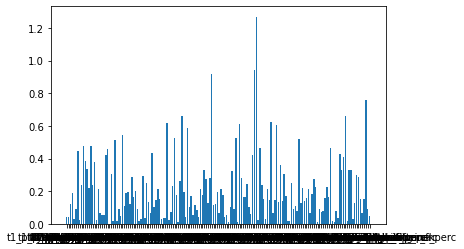

In [ ]:
import matplotlib
plt.bar(list(dfnew), np.absolute(WithoutCoef).flatten())
a = sorted(list(enumerate(np.absolute(WithoutCoef).flatten())), key = lambda x: x[1])
TopFeatures = []
for i in a[-21:-1]:
  TopFeatures.append(list(dfnew)[i[0]])
TopFeatures

['t2_player1_dpr',
 't1_player3_dpr',
 't2_player3_impact',
 't1_player1_dpr',
 't2_player5_kdr',
 't1_player2_kdr',
 't2_player5_wins_perc_after_fk',
 't2_player2_dpr',
 't1_player5_wins_perc_after_fk',
 't2_player3_kdr',
 't2_player1_kdr',
 't2_player5_dpr',
 't2_player4_kdr',
 't1_player3_wins_perc_after_fk',
 't2_player3_dpr',
 't1_player3_kdr',
 't1_player4_kdr',
 't2_player1_wins_perc_after_fk',
 't1_player1_wins_perc_after_fk',
 't1_player5_dpr']

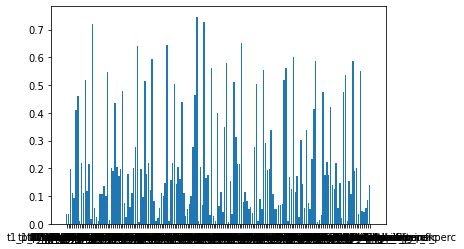

In [ ]:
plt.bar(list(df), np.absolute(WithCoef).flatten())
a = sorted(list(enumerate(np.absolute(WithCoef).flatten())), key = lambda x: x[1])
TopFeatures = []
for i in a[-21:-1]:
  TopFeatures.append(list(dfnew)[i[0]])
TopFeatures

In [36]:
#Add normalization

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(normalized_dfnew, normalized_dfNewWinner,test_size=0.2,random_state=42)
X_train_old, X_test_old, y_train_old, y_test_old = sklearn.model_selection.train_test_split(normalized_df, normalized_dfWinner,test_size=0.2,random_state=42)

model = sklearn.linear_model.LogisticRegression(solver='lbfgs', max_iter = 2000)
model.fit(X_train_old,y_train_old)
train_score = model.score(X_train_old, y_train_old)
test_score = model.score(X_test_old, y_test_old)
print("Without data-preprocessing, with normalization:")
print("Train Accuracy: {:3f}\nTest Accuracy: {:3f}".format(train_score, test_score))
WithoutCoef_Normalized = model.coef_

model = sklearn.linear_model.LogisticRegression(solver='lbfgs', max_iter = 2000)
model.fit(X_train,y_train)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print("With data-preprocessing, with normalization:")
print("Train Accuracy: {:3f}\nTest Accuracy: {:3f}".format(train_score, test_score))
WithCoef_Normalized = model.coef_

Without data-preprocessing, with normalization:
Train Accuracy: 0.648487
Test Accuracy: 0.555851
With data-preprocessing, with normalization:
Train Accuracy: 0.610668
Test Accuracy: 0.594174


['t1_player3_kpr',
 't1_player3_fk_perc_in_wins',
 't1_player1_rating',
 't2_player5_opk_rating',
 't2_player4_kpr',
 't2_player1_dpr',
 't2_player5_kdr',
 't1_player3_kdr',
 't2_player2_kdr',
 't2_player4_kdr',
 't1_player4_kdr',
 't2_player1_kdr',
 't1_player1_kpr',
 't1_player1_dmr',
 't1_player3_opk_rating',
 't2_player2_fk_perc_in_wins',
 't1_player4_dpr',
 't2_player1_kpr',
 't1_player2_fk_perc_in_wins',
 't1_player2_opk_rating']

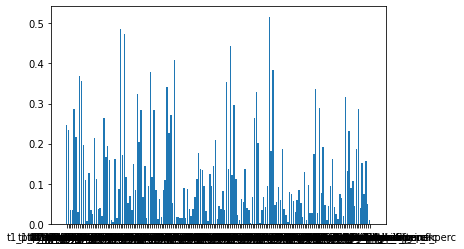

In [ ]:
plt.bar(list(df), np.absolute(WithoutCoef_Normalized).flatten())
a = sorted(list(enumerate(np.absolute(WithoutCoef_Normalized).flatten())), key = lambda x: x[1])
TopFeatures = []
for i in a[-21:-1]:
  TopFeatures.append(list(dfnew)[i[0]])
TopFeatures

['t1_player3_fk_perc_in_wins',
 't1_player4_dpr',
 't1_player5_fk_perc_in_wins',
 't1_player5_dmr',
 't1_player5_opk_rating',
 't1_player5_kpr',
 't2_player3_opk_rating',
 't2_player5_dpr',
 't1_player1_dpr',
 't2_player2_dpr',
 't2_player5_dmr',
 't1_player1_dmr',
 't2_player3_fk_perc_in_wins',
 't2_player3_dpr',
 't1_player4_dmr',
 't1_player2_dmr',
 't2_player3_dmr',
 't1_player5_kdr',
 't2_world_rank',
 't1_world_rank']

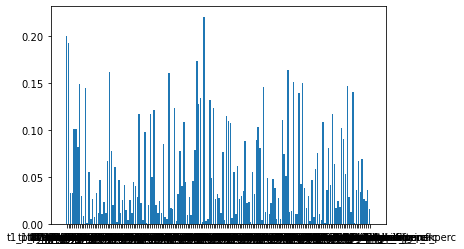

In [ ]:
plt.bar(list(df), np.absolute(WithCoef_Normalized).flatten())
a = sorted(list(enumerate(np.absolute(WithCoef_Normalized).flatten())), key = lambda x: x[1])
TopFeatures = []
for i in a[-21:-1]:
  TopFeatures.append(list(dfnew)[i[0]])
TopFeatures

In [30]:
import sklearn.ensemble
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(normalized_dfnew, normalized_dfNewWinner,test_size=0.2,random_state=42)
X_train_old, X_test_old, y_train_old, y_test_old = sklearn.model_selection.train_test_split(normalized_df, normalized_dfWinner,test_size=0.2,random_state=42)

model = sklearn.ensemble.RandomForestClassifier(n_estimators = 100, max_depth = 5)
model.fit(X_train_old,y_train_old)
train_score = model.score(X_train_old, y_train_old)
test_score = model.score(X_test_old, y_test_old)
print("Without data-preprocessing, with normalization:")
print("Train Accuracy: {:3f}\nTest Accuracy: {:3f}".format(train_score, test_score))


model = sklearn.ensemble.RandomForestClassifier(n_estimators = 100, max_depth = 5)
model.fit(X_train,y_train)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print("With data-preprocessing, with normalization:")
print("Train Accuracy: {:3f}\nTest Accuracy: {:3f}".format(train_score, test_score))


Without data-preprocessing, with normalization:
Train Accuracy: 0.726970
Test Accuracy: 0.610372
With data-preprocessing, with normalization:
Train Accuracy: 0.624235
Test Accuracy: 0.588853


In [34]:
import sklearn.naive_bayes
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(dfnew, dfNewWinner,test_size=0.2,random_state=42)
X_train_old, X_test_old, y_train_old, y_test_old = sklearn.model_selection.train_test_split(df, dfWinner,test_size=0.2,random_state=42)

model = sklearn.naive_bayes.MultinomialNB()
model.fit(X_train_old,y_train_old)
train_score = model.score(X_train_old, y_train_old)
test_score = model.score(X_test_old, y_test_old)
print("Without data-preprocessing, with normalization:")
print("Train Accuracy: {:3f}\nTest Accuracy: {:3f}".format(train_score, test_score))


model = sklearn.naive_bayes.MultinomialNB()
model.fit(X_train,y_train)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print("With data-preprocessing, with normalization:")
print("Train Accuracy: {:3f}\nTest Accuracy: {:3f}".format(train_score, test_score))


Without data-preprocessing, with normalization:
Train Accuracy: 0.596940
Test Accuracy: 0.578457
With data-preprocessing, with normalization:
Train Accuracy: 0.593409
Test Accuracy: 0.587390
